## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")

# Display  data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
edit_mouse_study_df=mouse_study_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume','Weight (g)':'Weight'})
edit_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#summary stats of the df
edit_mouse_study_df.describe()

,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [4]:
#shape of df
edit_mouse_study_df.shape

(1893, 8)

In [5]:
# Checking the number of mice.

number_of_mice=edit_mouse_study_df['Mouse ID'].count()
print(number_of_mice)

1893


In [6]:
#drop any NA values form the df
edit_mouse_study_df.dropna()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#sort df based on mouse ID and Timepoint for easy of data cleaning
sorted_mouse_study_df= edit_mouse_study_df.sort_values(["Mouse ID", "Timepoint"], ascending=(True,True))
sorted_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
sorted_mouse_study_df[sorted_mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
#verifying duplication of the values
sorted_mouse_study_df.loc[908:917]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
clean_mouse_study_df = sorted_mouse_study_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame. 
clean_mouse_study_df['Mouse ID'].count()


1888

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

Regimen_dose_df = clean_mouse_study_df.groupby("Drug Regimen")

mean_tumorvol=Regimen_dose_df["Tumor Volume"].mean()
median_tumorvol=Regimen_dose_df["Tumor Volume"].median()
var_tumorvol=Regimen_dose_df["Tumor Volume"].var()
std_tumorvol=Regimen_dose_df["Tumor Volume"].std()
sem_tumorvol=Regimen_dose_df["Tumor Volume"].sem()

Regimen_dose_summary_df = pd.DataFrame({"Mean":mean_tumorvol,
                                            "Median":median_tumorvol,
                                            "Variance":var_tumorvol,
                                            "Std":std_tumorvol,
                                            "Sem":sem_tumorvol})
Regimen_dose_summary_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
Regimen_df = clean_mouse_study_df.groupby("Drug Regimen")

regimen_counts=Regimen_df["Drug Regimen"].count()

regimen_counts_summary_df = pd.DataFrame({"Regimen Count":regimen_counts})
regimen_counts_summary_df.reset_index(level = None, inplace = True)
regimen_counts_summary_df.head()

,Drug Regimen,Regimen Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


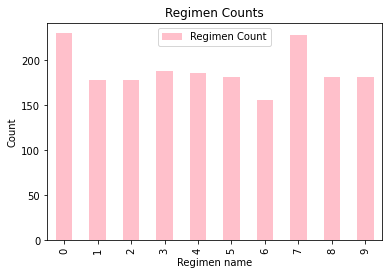

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

regimen_counts_summary_df.plot(kind="bar", facecolor="pink")
plt.title("Regimen Counts")
plt.ylabel("Count")
plt.xlabel("Regimen name")
plt.show()
plt.tight_layout()

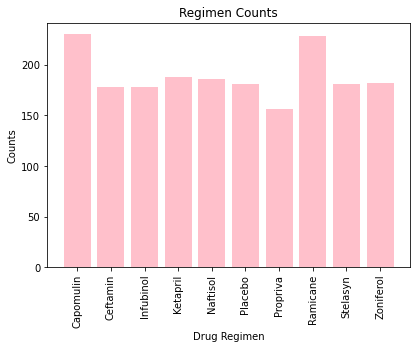

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

regimen_row=regimen_counts_summary_df['Drug Regimen']
regimen_column=regimen_counts_summary_df['Regimen Count']

fig=plt.figure(figsize=(6.5,4.5))
plt.bar(regimen_row,regimen_column,color='pink', alpha=1, align="center")
plt.xticks(regimen_row, regimen_counts_summary_df['Drug Regimen'], rotation="vertical")

plt.title("Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
plt.show()
plt.tight_layout()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = clean_mouse_study_df.groupby("Sex")
gender_count= gender_df["Sex"].count()
gender_summary_df = pd.DataFrame({"Gender Count":gender_count})
gender_summary_df.reset_index(level = None, inplace = True)
gender_summary_df

,Sex,Gender Count
0,Female,930
1,Male,958


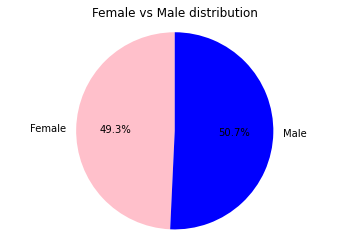

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex= gender_summary_df["Sex"]
count= gender_summary_df["Gender Count"]
colors= ["pink", "blue"]
explode= (0,0)

plt.title("Female vs Male distribution")
plt.pie(count, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")
plt.show()


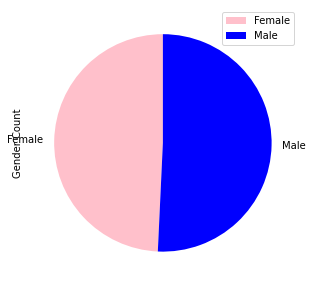

In [18]:
gender_summary_df.plot.pie(y="Gender Count", figsize=(5, 5), labels=['Female', 'Male'], colors=['pink','blue'], startangle=90)




## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

drug_timepoint=clean_mouse_study_df.groupby(["Mouse ID"])["Timepoint"].max()
drug_timepoint_max_df=pd.DataFrame(drug_timepoint)
drug_timepoint_max_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_max_df=pd.merge(clean_mouse_study_df,drug_timepoint_max_df, on=('Mouse ID', 'Timepoint'), how='right')
timepoint_max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [21]:
# Put treatments into a list for for loop (and later for plot labels)    
chosen_drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol=[]
ram_tumor_vol=[]
inf_tumor_vol=[]
cef_tumor_vol=[]

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in timepoint_max_df.iterrows():
    if row["Drug Regimen"]== chosen_drugs[0]:
        cap_tumor_vol.append(row["Tumor Volume"])
    if row["Drug Regimen"]==chosen_drugs[1]:
        ram_tumor_vol.append(row["Tumor Volume"])
    if row["Drug Regimen"]==chosen_drugs[2]:
        inf_tumor_vol.append(row["Tumor Volume"])
    if row["Drug Regimen"]==chosen_drugs[3]:
        cef_tumor_vol.append(row["Tumor Volume"])
        
  # add subset         
chosen_drug_tumor_vol_df= pd.DataFrame({chosen_drugs[0]:cap_tumor_vol,
                                       chosen_drugs[1]:ram_tumor_vol,
                                       chosen_drugs[2]:inf_tumor_vol,
                                       chosen_drugs[3]:cef_tumor_vol})
chosen_drug_tumor_vol_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [22]:
#calclumate upper bound and lower bound
chosen_drug_tumor_vol_df_max = chosen_drug_tumor_vol_df.max()
chosen_drug_tumor_vol_df_min = chosen_drug_tumor_vol_df.min()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_quartile = chosen_drug_tumor_vol_df[chosen_drugs[0]].quantile([0.25,0.5,0.75])
cap_lower = cap_quartile[0.25]
cap_median = cap_quartile[0.5]
cap_upper = cap_quartile[0.75]
cap_iqr= cap_upper-cap_lower
cap_lowerbound = cap_lower -(1.5*cap_iqr)
cap_upperbound = cap_upper +(1.5*cap_iqr)
cap_maximum = chosen_drug_tumor_vol_df[chosen_drugs[0]].max()
cap_minimum = chosen_drug_tumor_vol_df[chosen_drugs[0]].min()

ram_quartile = chosen_drug_tumor_vol_df[chosen_drugs[1]].quantile([0.25,0.5,0.75])
ram_lower = ram_quartile[0.25]
ram_median = ram_quartile[0.5]
ram_upper = ram_quartile[0.75]
ram_iqr= ram_upper-ram_lower
ram_lowerbound = ram_lower -(1.5*ram_iqr)
ram_upperbound = ram_upper +(1.5*ram_iqr)
ram_maximum = chosen_drug_tumor_vol_df[chosen_drugs[1]].max()
ram_minimum = chosen_drug_tumor_vol_df[chosen_drugs[1]].min()

inf_quartile = chosen_drug_tumor_vol_df[chosen_drugs[2]].quantile([0.25,0.5,0.75])
inf_lower = inf_quartile[0.25]
inf_median = inf_quartile[0.5]
inf_upper = inf_quartile[0.75]
inf_iqr= inf_upper-inf_lower
inf_lowerbound = inf_lower -(1.5*inf_iqr)
inf_upperbound = inf_upper +(1.5*inf_iqr)
inf_maximum = chosen_drug_tumor_vol_df[chosen_drugs[2]].max()
inf_minimum = chosen_drug_tumor_vol_df[chosen_drugs[2]].min()

#calclumate upper bound and lower bound
chosen_drug_tumor_vol_df_max = chosen_drug_tumor_vol_df.max()
chosen_drug_tumor_vol_df_min = chosen_drug_tumor_vol_df.min()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_quartile = chosen_drug_tumor_vol_df[chosen_drugs[0]].quantile([0.25,0.5,0.75])
cap_lower = cap_quartile[0.25]
cap_median = cap_quartile[0.5]
cap_upper = cap_quartile[0.75]
cap_iqr= cap_upper-cap_lower
cap_lowerbound = cap_lower -(1.5*cap_iqr)
cap_upperbound = cap_upper +(1.5*cap_iqr)
cap_maximum = chosen_drug_tumor_vol_df[chosen_drugs[0]].max()
cap_minimum = chosen_drug_tumor_vol_df[chosen_drugs[0]].min()

ram_quartile = chosen_drug_tumor_vol_df[chosen_drugs[1]].quantile([0.25,0.5,0.75])
ram_lower = ram_quartile[0.25]
ram_median = ram_quartile[0.5]
ram_upper = ram_quartile[0.75]
ram_iqr= ram_upper-ram_lower
ram_lowerbound = ram_lower -(1.5*ram_iqr)
ram_upperbound = ram_upper +(1.5*ram_iqr)
ram_maximum = chosen_drug_tumor_vol_df[chosen_drugs[1]].max()
ram_minimum = chosen_drug_tumor_vol_df[chosen_drugs[1]].min()

inf_quartile = chosen_drug_tumor_vol_df[chosen_drugs[2]].quantile([0.25,0.5,0.75])
inf_lower = inf_quartile[0.25]
inf_median = inf_quartile[0.5]
inf_upper = inf_quartile[0.75]
inf_iqr= inf_upper-inf_lower
inf_lowerbound = inf_lower -(1.5*inf_iqr)
inf_upperbound = inf_upper +(1.5*inf_iqr)
inf_maximum = chosen_drug_tumor_vol_df[chosen_drugs[2]].max()
inf_minimum = chosen_drug_tumor_vol_df[chosen_drugs[2]].min()

cef_quartile = chosen_drug_tumor_vol_df[chosen_drugs[3]].quantile([0.25,0.5,0.75])
cef_lower = cef_quartile[0.25]
cef_median = cef_quartile[0.5]
cef_upper = cef_quartile[0.75]
cef_iqr= cef_upper-cef_lower
cef_lowerbound = cef_lower -(1.5*cef_iqr)
cef_upperbound = cef_upper +(1.5*cef_iqr)
cef_maximum = chosen_drug_tumor_vol_df[chosen_drugs[3]].max()
cef_minimum = chosen_drug_tumor_vol_df[chosen_drugs[3]].min()

box_plot_df = pd.DataFrame({'Drug':chosen_drugs,
                           'Lower Quartile':[cap_lower,ram_lower,inf_lower,cef_lower],
                           'Upper Quartile':[cap_upper,ram_upper,inf_upper,cef_upper],
                           'IQR':[cap_iqr,ram_iqr,inf_iqr,cef_iqr],
                           'Median':[cap_median,ram_median,inf_median,cef_median],
                           'Upper Bound':[cap_upperbound,ram_upperbound,inf_upperbound,cef_upperbound],
                           'Lower Bound':[cap_lowerbound, ram_lowerbound,inf_lowerbound,cef_lowerbound],
                           'Max value':[cap_maximum,ram_maximum,inf_maximum,cef_maximum],
                           'Min value':[cap_minimum,ram_minimum,inf_minimum,cef_minimum]})
box_plot_df 

,Drug,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max value,Min value
0,Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
1,Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126
2,Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000


In [23]:
#group by Drug so that it is easy to plot
group_box_plot_df=box_plot_df.groupby('Drug')
group_box_plot_df.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max value,Min value
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


In [24]:
# Determine outliers using upper and lower bounds. Looking for values out of this range.
print(f"Comparing the lower and upper bound, drug Infubinol had a mouse with tumour size of - 36.32")

Comparing the lower and upper bound, drug Infubinol had a mouse with tumour size of - 36.32


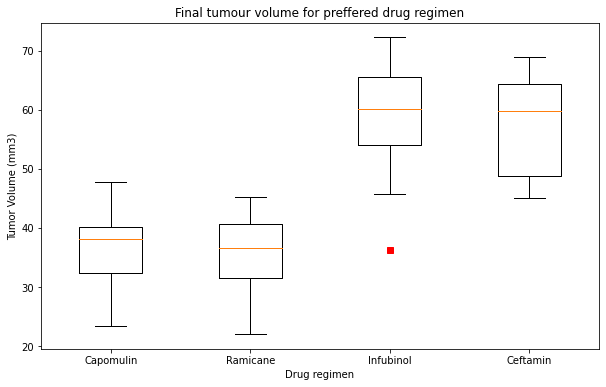

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create the list
box_plot_column=[chosen_drug_tumor_vol_df[chosen_drugs[0]],
                 chosen_drug_tumor_vol_df[chosen_drugs[1]],
                 chosen_drug_tumor_vol_df[chosen_drugs[2]],
                 chosen_drug_tumor_vol_df[chosen_drugs[3]]]
#plot the graph
fig1, ax = plt.subplots(figsize=(10,6))
ax.set_title('Final tumour volume for preffered drug regimen')
ax.set_xlabel('Drug regimen')
ax.set_ylabel('Tumor Volume (mm3)')
#add attributes to graph and save.
ax.boxplot(box_plot_column, 0, 'rs')
plt.xticks([1,2,3,4], chosen_drugs)
plt.savefig('Tumor Volume Boxplot')
plt.show()

## Line and Scatter Plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_k403_df =clean_mouse_study_df.loc[clean_mouse_study_df["Mouse ID"]=='k403']
mouse_k403_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


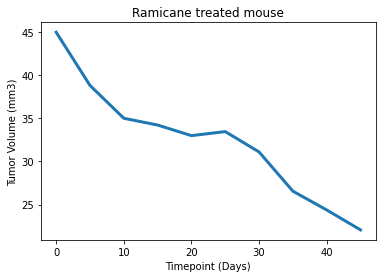

In [27]:
#k403 mouse ID looks of interest to investigate
# x axis is defined by the values among timepointsand stored in a variable for ease of calling
x_axisTimepoint = mouse_k403_df["Timepoint"]
# y axis is defined by the values of tumor volume and stored in a variable for ease of calling
tumorsize = mouse_k403_df["Tumor Volume"]
#plot graph
plt.title("Ramicane treated mouse")
#plt.plot() with x and y customised
plt.plot(x_axisTimepoint, tumorsize, linewidth=3, markersize=14)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('Ramicane treated mouse linechart')
plt.show()

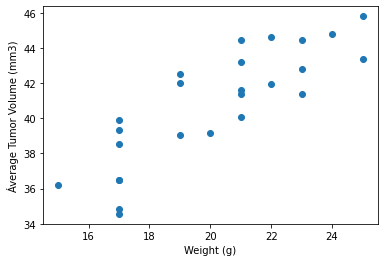

,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#pull out capomulin values
capomulin_df= clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen']=="Capomulin",:]
# group by Mouse ID and use avg as the aggregate function
Capomulin_avg= capomulin_df.groupby(['Mouse ID']).mean()
#Plot scatter plot based in the newly defined df
plt.scatter(Capomulin_avg["Weight"], Capomulin_avg["Tumor Volume"])
plt.xlabel('Weight (g)')
plt.ylabel('Áverage Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()
Capomulin_avg

## Correlation and Regression

In [29]:
# Calculating the correlation coefficient and linear regression model 

#employing pearson's correlation
correlation=round(st.pearsonr(Capomulin_avg['Weight'],Capomulin_avg['Tumor Volume'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
#assign a variable to the linear regression formaula to obtain the parameters values
model=st.linregress(Capomulin_avg['Weight'],Capomulin_avg['Tumor Volume'])
model





The correlation between mouse weight and average tumor volume is 0.84


LinregressResult(slope=0.9544396890241047, intercept=21.55216053268501, rvalue=0.8419363424694719, pvalue=1.3225722434712642e-07, stderr=0.12754359033201335)

In [30]:
slope = 0.9544396890241047
intercept = 21.55216053268501

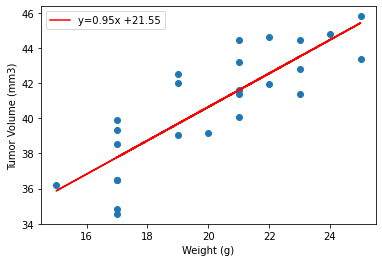

In [31]:
#plot the line graph
line=slope*(Capomulin_avg['Weight'])+intercept

plt.scatter(Capomulin_avg['Weight'], Capomulin_avg['Tumor Volume'])

plt.plot(Capomulin_avg['Weight'], line, 'r', label = 'y={:.2f}x +{:.2f}'.format(slope,intercept))
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.savefig('Linear regression')
plt.show()

In [ ]:
# OBSERVATIONS
#1. The linear regression results suggests that the positive relationship exists between the capomulin drug and the tumor 
#   reduction. The greater the usage of the drug the greater the reduciton of the tumour. Similiar work can used to establish the 
#   effectiveness of the other drugs.
#2. From the box whisker plot analsysis it is evident that the capomulin and ramicane were equally effective in containing the tumor
#   spread in comparison to other drugs.
#3. The isolated assesment of the mouse ID 403 under ramicane indicates that the drug was effective in bring the tumor spread under control.
## More such detailed analysis can be performed to shed brighter light into this question.
